# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

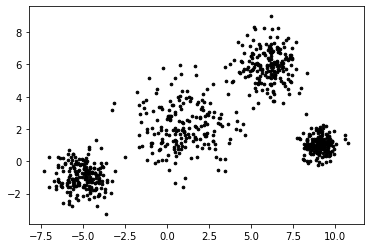

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

#Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

In [3]:
print("Shape of the dataset is :", data.shape)
data

Shape of the dataset is : (800, 2)


array([[ 1.66184123,  1.50369477],
       [ 4.64615678,  1.62186181],
       [ 1.16441476,  4.37372168],
       ...,
       [-5.94762563,  0.05925507],
       [-5.5282781 , -0.16683908],
       [-5.02162618, -0.15647292]])

# Intrepretation

----

Above piece of code shows the shape of the dataset for which different centroids will be calculated.

Data is __`2D`__ in shape and also printing the data as well.

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

### In the looming cells, number of **clusters** are defined i.e., k=4 and its **mean** and **standard deviation** is calculated.

In [4]:
k=4
mean=data.mean()
std=np.std(data)
print ("The mean for the normalised data is:",mean)
print ("The standard deviation for the normalised data is:",std)

The mean for the normalised data is: 2.3897478180960845
The standard deviation for the normalised data is: 4.319440166126304


In [5]:
np.random.seed(6)
centres = np.random.randn(k,2)*std + mean #centres variable stores value of the calculated centroids
print(centres)

[[ 1.0430169   5.53863665]
 [ 3.33061168 -1.4938254 ]
 [-8.35175241  6.33448312]
 [ 7.25803215 -4.15028729]]


# Intrepretation

---

Random series has been generated and clusters are chosen 4 (k=4). Centres are generated as per the given formula in the description above __`(**np.random.randn(k,c)*std + mean`__, where std is the standard deviation - measure that is used to depict the amount of variation of data values from the avrerage value and mean is the average of the values)

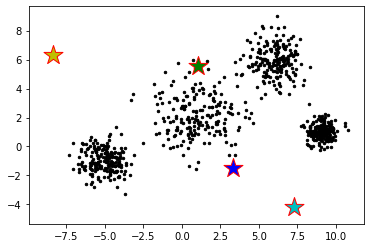

In [6]:
def gen_random_centres():
    plt.scatter(data[:,0], data[:,1], s=6, c='k')
    color_coding=['g','b','y','c']
    for i in range(4):
        color=color_coding[i]
        plt.scatter(centres[i][0],centres[i][1],marker='*', s=400, c=color,edgecolor='r')
gen_random_centres()

# Intrepretation

----

Above mentioned function `gen_random_centres` perform the plotting of different centroids on the data arbitrary with the defined __`color coding of green, blue,yellow and cyan color and edge color as red.`__

For loop is running 4 times because we have to update 4 centroids.

## 2. Visualise the clustering results in each iteration

## `Kmeans Algorithm`

### Kmeans clustering is an unsupervised machine learning algorithm used when we have data which has no labels, groups and categories; our aim is to search for the groups within the data with the value defined for k.

Basic steps involve in the Kmeans algorthim :

1. Begins with K randomly placed centroids.
2. We will assign each data point to the nearest centroid.
3. Re calculate the centroids for each set of points(clusters) , assigning each data point to the closest one.
4. If the centroid estimate has not changed significantly, terminate the process, otherwise repeat from step 2.

In [7]:
clusters=np.zeros(len(data))
clusters.shape

(800,)

In [8]:
def euc_dist(point, centroid, ax=1):
    return np.linalg.norm(point - centroid, axis=ax) 

# Intrepretation

---

To Calculate __`eucledian_distance`__ , function has euc_dist has been defined .

In [9]:
def cluster_search():
    for i in range(len(data)):    
        distances = euc_dist(data[i],centres)
        cluster = np.argmin(distances)
        clusters[i] = cluster

# Intrepretation

----

A function __`cluster_search`__ has been defined to find the nearest cluster to assign a respective centroid to that cluster.

In [10]:
def centres_search(): 
    for d in range(k):
        pts=[data[j] for j in range(len(data)) if clusters[j]==d]
        centres[d]=np.mean(pts,axis=0)

# Intrepretation

----

A function named __`centres_search`__ has been defined to find the new centres using the averages of the points which belong to the same cluster.

In [11]:
cluster_search()
print(clusters)

[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Intrepretation

----

Calling the aformentioned function __`cluster_search`__ and print its outout.

[[ 3.99620775  4.82013001]
 [-1.08109426 -0.14715591]
 [-5.54024032 -0.68960389]
 [ 9.09422694  1.02197195]]


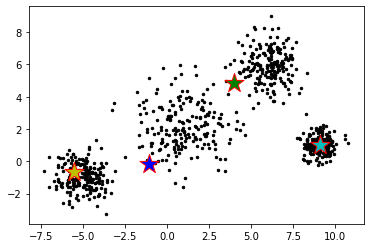

In [12]:
centres_search()
print(centres)
gen_random_centres()

# Intrepretation

Printing the new centres in the form of an array.

# Calling cluster_search and centres_search again and again to get new centres and plot them using gen_random_centeres.

[[ 4.90132371  5.15030358]
 [ 0.24633035  1.5433697 ]
 [-5.0796739  -0.95753889]
 [ 9.05236058  1.0794625 ]]


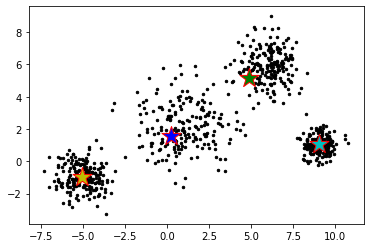

In [13]:
cluster_search()
centres_search()
print(centres)
gen_random_centres()

# Intrepretation

----

Above piece of code shows 2nd iteration of updating centroids. gen_random_centres() prints the new centres.

[[ 5.76438788  5.71757292]
 [ 0.77137496  2.03200622]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


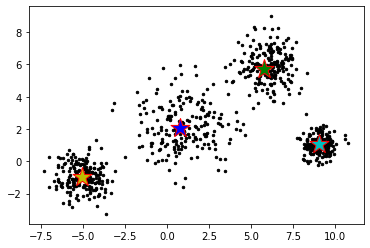

In [14]:
cluster_search()
centres_search()
print(centres)
gen_random_centres()

# Intrepretation

----

Above piece of code shows 3rd iteration of updating centroids. gen_random_centres() prints the new centres.

[[ 5.97243759  5.88784838]
 [ 0.93973117  2.13879788]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


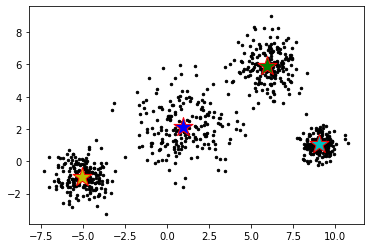

In [15]:
cluster_search()
centres_search()
print(centres)
gen_random_centres()

# Intrepretation

----

Above piece of code shows 4th iteration of updating centroids. gen_random_centres() prints the new centres.

[[ 6.0053298   5.92528865]
 [ 0.98297825  2.15787959]
 [-5.05717014 -0.94967031]
 [ 9.063639    1.04633907]]


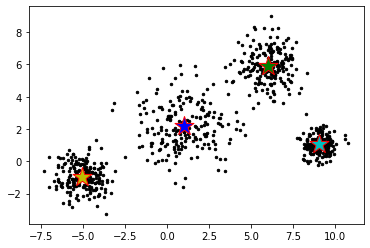

In [16]:
cluster_search()
centres_search()
print(centres)
gen_random_centres()

# Intrepretation

----

Above piece of code shows 5th iteration of updating centroids. gen_random_centres() prints the new centres.

# Conclusion

We can see that in the last iteration __`there is no significant change in the centroids`__, here we can hault our process and we can say that aformentioned plot is the final one.